In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl
%matplotlib inline

downloading the data set for our prediction

In [5]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2020-04-21 22:05:58--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  57.0KB/s    in 1.2s    

2020-04-21 22:06:03 (57.0 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



# Reading the csv file


<h2 id="understanding_data">Understanding the Data</h2>

### `FuelConsumption.csv`:
We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


In [7]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [9]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [11]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

In [12]:
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


### ploting these features:

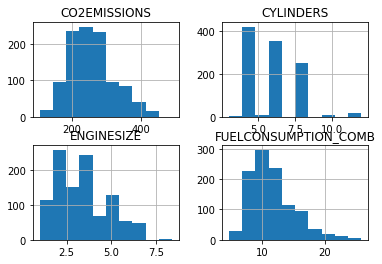

In [15]:
plotF = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

plotF.hist()
plt.show()

Now, lets plot each of these features vs the Emission, to see how linear is their relation:

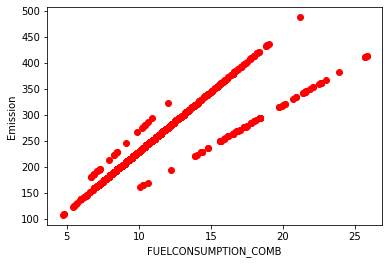

In [16]:
plt.scatter(cdf.FUELCONSUMPTION_COMB,cdf.CO2EMISSIONS, color='red')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

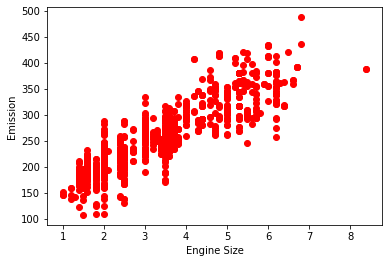

In [17]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS, color='red')
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

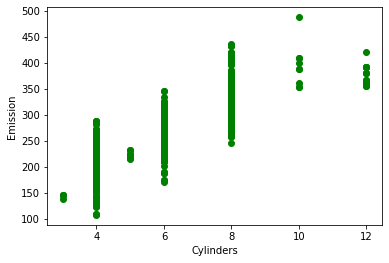

In [18]:
plt.scatter(cdf.CYLINDERS,cdf.CO2EMISSIONS, color='green')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

#### Creating train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. 
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

This means that we know the outcome of each data point in this dataset, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Lets split our dataset into train and test sets, 80% of the entire data for training, and the 20% for testing. We create a mask to select random rows using __np.random.rand()__ function: 

In [20]:
mask = np.random.rand(len(df))<0.8
train_data = cdf[mask]
test_data = cdf[~mask]

Simple Regression MOdel for this

Train data distribution:

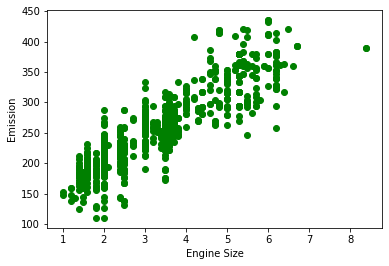

In [22]:
plt.scatter(train_data.ENGINESIZE,train_data.CO2EMISSIONS, color='green')
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

#### Modeling :
Using sklear package to model data

In [26]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_X = np.asanyarray(train_data[['ENGINESIZE']])
train_Y = np.asanyarray(train_data[['CO2EMISSIONS']])
regr.fit(train_X,train_Y)

print('The Coffecients:',regr.coef_)
print('Intercept :',regr.intercept_)


The Coffecients: [[39.49320471]]
Intercept : [124.10089715]


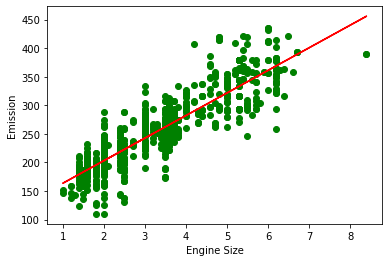

In [27]:
plt.scatter(train_data.ENGINESIZE,train_data.CO2EMISSIONS, color='green')
plt.plot(train_X,regr.coef_[0][0]*train_X+regr.intercept_[0],'-r')
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

Evaluation

In [34]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test_data[['ENGINESIZE']])
test_Y = np.asanyarray(test_data[['CO2EMISSIONS']])
test_y_hat = regr.predict(test_x)

print("Mean absolute Error: %.2f" %np.mean(np.absolute(test_Y_hat-test_Y)))
print("Residual sum of squares (MSE): %.2f" %np.mean(np.absolute(test_Y_hat-test_Y)**2))
print("R2-score: %.2f"% r2_score(test_y_hat,test_Y))
 

Mean absolute Error: 24.93
Residual sum of squares (MSE): 1029.74
R2-score: 0.67
